# Linear Regression - Sklearn, Statsmodel, TensorFlow, Keras, PyTorch

Author: Harry Yau

Date: September 22, 2019

This goal of this notebook is to compute a Linear Regression using different frameworks. The frameworks that will be investigated are:
- Sklearn
- Statsmodel
- TensorFlow
- Keras
- PyTorch

The Ordinary Least Squares equation is the following:

\begin{equation}
Y_i = \beta_0 + \beta_1 X_i + \epsilon_i
\end{equation}

The data will be created according to this equation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_output(X, y, predicted=None):
    '''
    Plots Regression Line Charts
    
    Arguments:
    X - Accepts a DataFrame or numpy array for the X data
    y - Accepts a DataFrame or numpy array for the y data
    predicted - Accepts a DataFrame or numpy array for the predicted y data. If None, this function only plots the scatter plot.
    '''
    
    plt.clf()
    plt.plot(X, y, 'go', label='True Data', alpha=0.5)
    if predicted is not None:
        plt.plot(X, predicted, '--', label='Predictions', alpha=0.5)
        plt.legend(loc='best')
    plt.show();

In [3]:
np.random.seed(1) #Setting a seed to recreate experiment.
num_points = 250 #The number of data points

X = 2.5 * np.random.randn(num_points) + 1.5   # Array of 100 values with mean = 1.5, stddev = 2.5
res = 0.5 * np.random.randn(num_points)       # Generate 100 residual terms
y = 2 + 0.3 * X + res                  # Actual values of Y

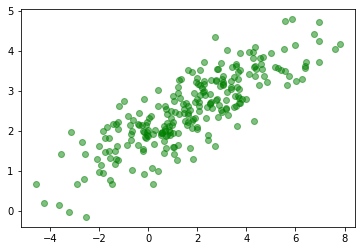

In [4]:
plot_output(X, y)

Reshaping X and Y necessary when the data has one column so that sklearn and pytorch will work properly. In addition, the numpy array is forced to have dtype np.float32 so that pytorch will accept these values.

In [5]:
X = np.array(X, dtype=np.float32).reshape(-1,1)
y = np.array(y, dtype=np.float32).reshape(-1,1)

Scaling the data so that it helps with convergence when running gradient descent in TensorFlow, Keras and Pytorch.

In [6]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X)

y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y)

In [7]:
def plot_output(X, y, predicted=None):
    '''
    Plots Regression Line Charts
    
    Arguments:
    X - Accepts a DataFrame or numpy array for the X data
    y - Accepts a DataFrame or numpy array for the y data
    predicted - Accepts a DataFrame or numpy array for the predicted y data
    '''
    
    plt.clf()
    plt.plot(X, y, 'go', label='True Data', alpha=0.5)
    if predicted is not None:
        plt.plot(X, predicted, '--', label='Predictions', alpha=0.5)
        plt.legend(loc='best')
    plt.show();

### Sklearn

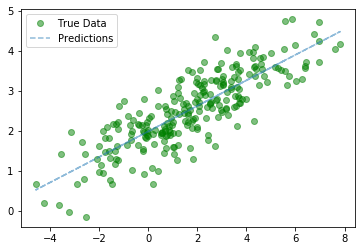

In [8]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression() #Set the model
lin_model.fit(X,y) #Fit the model
predicted = lin_model.predict(X)
plot_output(X, y, predicted)

### Statsmodel

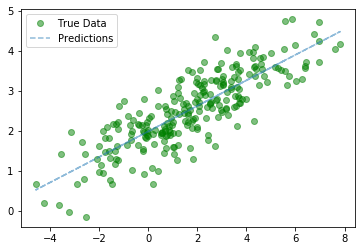

In [9]:
import statsmodels.api as sm # For constants
from statsmodels.regression import linear_model

#Compared to SKLearn, statsmodel doesn't include the bias term.
X_c = sm.add_constant(X) 
linear_model_sm = linear_model.OLS(y, X_c).fit()  #Fit the model
predicted = linear_model_sm.predict(X_c)
plot_output(X, y, predicted)

### Standardized Settings for TensorFlow, Keras and PyTorch

In [10]:
input_dim = 1        # takes variable 'x' 1 input variable.
output_dim = 1       # takes variable 'y' 1 output variable.
learning_rate = 0.01 
epochs = 1000

### TensorFlow

Steps to calculate a linear regression using TensorFlow. The goal is to create the placeholders and variables to satisfy the following linear equation:
$$ y = Wx + b$$

In [11]:
import tensorflow as tf
print('Version:', tf.__version__)

Version: 1.14.0


1. Create placeholders for X and y, because these values will be supplied in the opimization step using feed_dict.

In [12]:
X_tf = tf.placeholder(dtype=tf.float32, shape=[None, input_dim])
y_tf = tf.placeholder(dtype=tf.float32, shape=[None, output_dim])

2. Create variables for W and b. Initializing W with Xavier/Glorot Initialization and b with zeros. W and B are updated during gradient descent so that its why they are variables instead of placeholders

In [13]:
W_tf = tf.Variable(tf.glorot_uniform_initializer()((input_dim, output_dim)), dtype=tf.float32, name='W')
b_tf = tf.Variable(np.zeros([output_dim,1]), dtype=tf.float32, name='b')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


3. Define the y predicted equation

In [14]:
#WX + b
y_pred_tf = tf.add(tf.matmul(X_tf, W_tf), b_tf)

4. Define the Cost Function. 
In the case of Linear Regression, the Mean Squared Error is being minimized:
$$MSE = \frac{1}{n} \sum_{i=1}^n (\hat{y_i} - y_i)^2$$

In [15]:
#The cost function
cost_tf = tf.losses.mean_squared_error(y_tf, y_pred_tf)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


5. Set the optimizer.

In [16]:
#The optimizer
optimizer_tf = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_tf)

6. Set the Global Variables Initializer. This step is mandatory.

In [17]:
#Global Variables Initilializer -- Mandatory
init = tf.global_variables_initializer()

7. Running the computation graph.

In [18]:
#The Tensorflow Session
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(epochs):
        
        #The dictionary to feed in the variables for hte optimizer
        feed_dict = {X_tf: X_scaled, y_tf: y_scaled}
        
        #Run the optimizer at every epoch
        #Also saves the weight and bias.
        _, weight, bias = sess.run([optimizer_tf, W_tf, b_tf], feed_dict)
            
        if (epoch + 1) % 50 == 0:
            #Calculate the cost at every epoch
            print("Epoch", (epoch + 1), ": cost =", cost_tf.eval(feed_dict)) 

Epoch 50 : cost = 0.34818947
Epoch 100 : cost = 0.31586316
Epoch 150 : cost = 0.31157604
Epoch 200 : cost = 0.3110075
Epoch 250 : cost = 0.31093213
Epoch 300 : cost = 0.31092212
Epoch 350 : cost = 0.3109208
Epoch 400 : cost = 0.31092063
Epoch 450 : cost = 0.31092063
Epoch 500 : cost = 0.31092063
Epoch 550 : cost = 0.3109206
Epoch 600 : cost = 0.31092063
Epoch 650 : cost = 0.3109206
Epoch 700 : cost = 0.3109206
Epoch 750 : cost = 0.3109206
Epoch 800 : cost = 0.3109206
Epoch 850 : cost = 0.3109206
Epoch 900 : cost = 0.3109206
Epoch 950 : cost = 0.3109206
Epoch 1000 : cost = 0.3109206


8. Calculate the y predicted values. Note: Remember to unscale your data.

In [19]:
predicted = weight * X_scaled + bias
predicted = y_scaler.inverse_transform(predicted) 

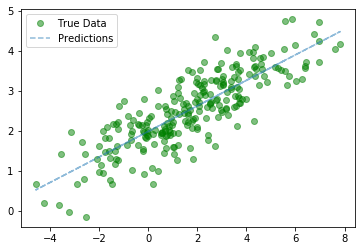

In [20]:
plot_output(X, y, predicted)

### Keras

Keras is a high-level API that uses TensorFlow as its backend. Creating a model is simpler with the Keras API. Essentially this is similar to putting together lego bricks.

In [21]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
print('Version:', tf.keras.__version__)

Version: 2.2.4-tf


1. Creating a Sequential model in Keras. A Sequential model is when layers are linearly stacked.
    - For a Linear Regression, the activation layer will be 'linear' and the output dimension being 1 due to a value being a regression.
    - The input shape needs to be defined.
    - This layer is essentially y = Wx + b, with an activation of 'linear'. 'linear' means that no additional calculations will be done and will return the identity y = Wx + b.

In [22]:
model = Sequential([
    Dense(output_dim, activation='linear',  input_shape=(input_dim,)),       
])

2. Setting the loss function, optimizer and then compiling the model. This step configures the model for training

In [23]:
optimizer = tf.keras.optimizers.SGD(learning_rate)

model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


3. Training the model using fit()

In [25]:
history = model.fit(x = X_scaled, y = y_scaled, epochs = epochs, verbose=0)

4.Calculate the y predicted values using the predict() function on the model. Note: Remember to unscale your data.

In [26]:
predicted = model.predict(X_scaled)
predicted = y_scaler.inverse_transform(predicted)

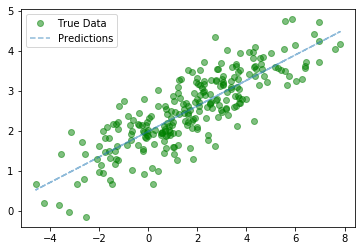

In [27]:
plot_output(X, y, predicted)

### PyTorch

PyTorch is a framework created by Facebook. Implementing the model is slightly different. The most apparent differences is the way forward propagation is coded and GPU implementation is not seamless.

In [28]:
import torch
print('Version:', torch.__version__)

Version: 1.2.0


1. Create the model.
    - <a href="https://pytorch.org/docs/stable/nn.html#torch.nn.Linear">torch.nn.Linear</a> applies a linear transformation to y = Wx + b
    - The forward propagation passes x to the linear transformation

In [29]:
class LinearRegressionModel(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.linear(x)
        return out

2. Initiate the model.

In [30]:
model = LinearRegressionModel(input_dim, output_dim)

####### For GPU #######
if torch.cuda.is_available():
    model.cuda()

3.  Initiate the cost function and the optimizer.

In [31]:
criterion = torch.nn.MSELoss()
optimiser = torch.optim.SGD(model.parameters(), lr = learning_rate)

4. Converting the numpy data to torch tensors.

In [32]:
# Converting X inputs and y labels to torch tensors
if torch.cuda.is_available():
    ####### For GPU #######
    X_data = torch.from_numpy(X_scaled).cuda()
    y_data = torch.from_numpy(y_scaled).cuda()
else:
    X_data = torch.from_numpy(X_scaled)
    y_data = torch.from_numpy(y_scaled)

5. Training the model.
 - Clear gradient buffer
 - Forward propagation
 - Get loss 
 - Get gradients from backward propagation
 - Update parameters for gradient descent
 - Rinse and repeat

In [33]:
for epoch in range(epochs):
    # Clear gradient buffers in the optimiser so that it doesn't carry forward
    optimiser.zero_grad()

    #The forward propagation step.
    y_pred = model(X_data)
    
    # Get loss for the predicted output
    loss = criterion(y_pred, y_data)
    
    # Get gradients w.r.t to parameters. This is the backward propagation step.
    loss.backward()

    # Update parameters for gradient descent
    optimiser.step()
    if (epoch + 1) % 50 == 0:
        print('epoch {}, loss {}'.format(epoch + 1, loss.item()))    

epoch 50, loss 0.3125697076320648
epoch 100, loss 0.311139315366745
epoch 150, loss 0.3109495937824249
epoch 200, loss 0.3109244406223297
epoch 250, loss 0.3109211027622223
epoch 300, loss 0.31092068552970886
epoch 350, loss 0.3109205961227417
epoch 400, loss 0.3109205961227417
epoch 450, loss 0.3109205961227417
epoch 500, loss 0.3109206259250641
epoch 550, loss 0.3109205961227417
epoch 600, loss 0.3109205961227417
epoch 650, loss 0.3109205961227417
epoch 700, loss 0.3109205961227417
epoch 750, loss 0.3109205961227417
epoch 800, loss 0.3109205961227417
epoch 850, loss 0.3109205961227417
epoch 900, loss 0.3109205961227417
epoch 950, loss 0.3109205961227417
epoch 1000, loss 0.3109205961227417


6. Calculate the y predicted by passing in the data into the model.Note: Remember to unscale your data.

In [34]:
with torch.no_grad():
    if torch.cuda.is_available():
        predicted = model(torch.from_numpy(X_scaled).cuda()).cpu().data.numpy()
    else:
        predicted = model(torch.from_numpy(X_scaled)).data.numpy()

predicted = y_scaler.inverse_transform(predicted)

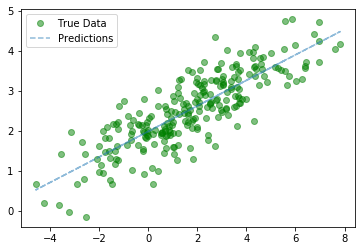

In [35]:
plot_output(X, y, predicted)